In [1]:
# import numpy as np
# import MDAnalysis as mda
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import numpy as np 
import matplotlib.pyplot as plt
print(mda.__version__)

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.3.0


In [2]:
# important paths 
# path to topol file 
topol = 'Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj'
# paths to trajectory files
traj_1_5 = 'Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd'
traj_1_0 = 'Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd'
traj_0_9 = 'Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd'
traj_0_8 = 'Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd'
traj_0_7 = 'Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd'
traj_0_65 = 'Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd'
traj_0_6 = 'Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd'
traj_0_55 = 'Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd'
traj_0_5 = 'Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd'
traj_0_475 = 'Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd'

In [3]:
# load lampmps data from Data using MDAnalysis
prod_1_5 = mda.Universe(topol, traj_1_5, topology_format="LAMMPSDUMP")
prod_1_0 = mda.Universe(topol, traj_1_0, topology_format="LAMMPSDUMP")
prod_0_9 = mda.Universe(topol, traj_0_9, topology_format="LAMMPSDUMP")
prod_0_8 = mda.Universe(topol, traj_0_8, topology_format="LAMMPSDUMP")
prod_0_7 = mda.Universe(topol, traj_0_7, topology_format="LAMMPSDUMP")
prod_0_65 = mda.Universe(topol, traj_0_65, topology_format="LAMMPSDUMP")
prod_0_6 = mda.Universe(topol, traj_0_6, topology_format="LAMMPSDUMP")
prod_0_55 = mda.Universe(topol, traj_0_55, topology_format="LAMMPSDUMP")
prod_0_5 = mda.Universe(topol, traj_0_5, topology_format="LAMMPSDUMP")
prod_0_475 = mda.Universe(topol, traj_0_475, topology_format="LAMMPSDUMP")

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [7]:
# type of selection 
sel1 = 'type 1'
sel2 = 'type 2'

# create list of all prods
prods = [prod_1_5, prod_1_0, prod_0_9, prod_0_8, prod_0_7, prod_0_65, prod_0_6, 
         prod_0_55, prod_0_5, prod_0_475]

In [8]:
# compute the radial distribution function between type 1 and type 1 particles, type 2 and type 2, and type 1 and type 2
# use the default parameters for the RDF
# compute radial distribution function between type 1 and type 1 particles for all files 
# in a for loop iterate through prods
rdfs_1 = []
rdfs_2 = []
rdfs_1_2 = []
for p in prods: 
    r1 = rdf.InterRDF(p.select_atoms(sel1), p.select_atoms(sel1), nbins=100, range=(0.0, 10.0))
    r2 = rdf.InterRDF(p.select_atoms(sel2), p.select_atoms(sel2), nbins=100, range=(0.0, 10.0))
    r3 = rdf.InterRDF(p.select_atoms(sel1), p.select_atoms(sel2), nbins=100, range=(0.0, 10.0))
    r1.run()
    r2.run()
    r3.run()
    rdfs_1.append(r1)
    rdfs_2.append(r2)
    rdfs_1_2.append(r3)
print(rdfs_1)


[<MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329d895b0>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329e7c2e0>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329e7c970>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329e7cfa0>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329e05610>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329e058b0>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329dc1f70>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329dc1820>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329db3100>, <MDAnalysis.analysis.rdf.InterRDF object at 0x7f1329db3a60>]


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


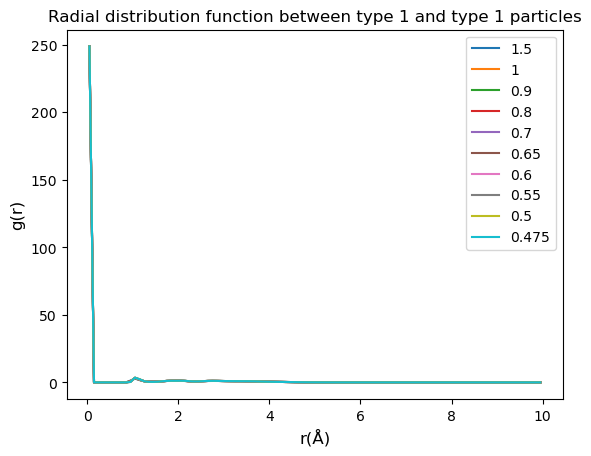

In [12]:
# plot the radial distribution function between type 1 and type 1 particles for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdfs_1[i].bins, rdfs_1[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r(Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Radial distribution function between type 1 and type 1 particles')
plt.savefig('RDF_1_1.png')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


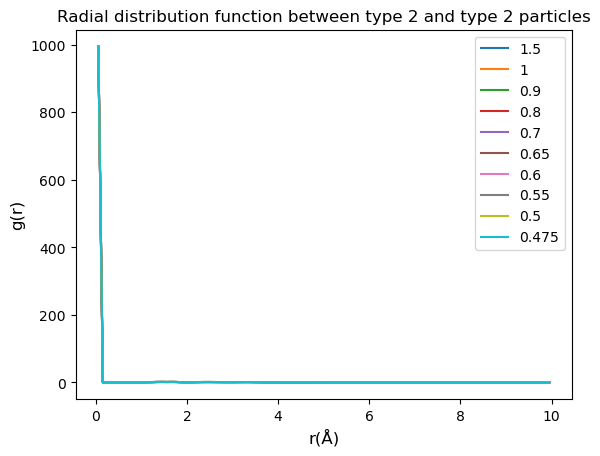

In [13]:
# plot the radial distribution function between type 2 and type 2 particles for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdfs_2[i].bins, rdfs_2[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r(Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Radial distribution function between type 2 and type 2 particles')
plt.savefig('RDF_2_2.png')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


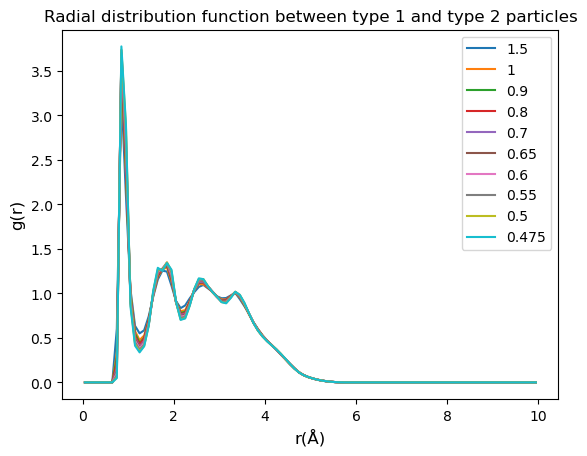

In [15]:
# plot the radial distribution function between type 1 and type 2 particles for all files
temp_list=['1.5', '1', '0.9', '0.8', '0.7', '0.65', '0.6', '0.55', '0.5', '0.475']
for i in range(len(temp_list)):
    plt.plot(rdfs_1_2[i].bins, rdfs_1_2[i].rdf, label=temp_list[i])
plt.legend()
plt.xlabel('r(Å)', fontsize=12)
plt.ylabel('g(r)', fontsize=12)
plt.title('Radial distribution function between type 1 and type 2 particles')
plt.savefig('RDF_1_2.png')

[<MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f13288c8880>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f132880d790>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f13289cd9d0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f132885fe20>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f132884f700>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f132884f250>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f132884ffa0>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f1328825d00>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f1328413580>, <MDAnalysis.analysis.msd.EinsteinMSD object at 0x7f1328466340>]


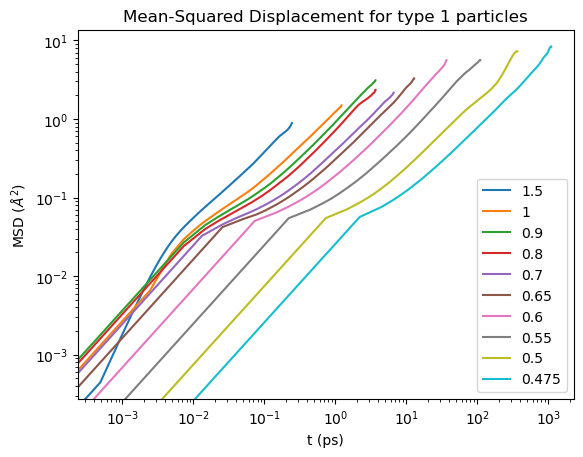

In [29]:
# compute the mean-squared displacement for type 1 particles at each tempearture
# use the default parameters for the MSD
# compute the mean-squared displacement for type 1 particles
msd_all = []
for p in prods: 
    msd_1 = msd.EinsteinMSD(p, select='type 1')
    msd_1.run()
    msd_all.append(msd_1)
print(msd_all)
for i, msd_result in enumerate(msd_all):
    plt.loglog(msd_result.times, msd_result.results.timeseries, label=temp_list[i])
plt.legend()
plt.xlabel('t (ps)')
plt.ylabel('MSD ($\AA^2$)')
plt.title('Mean-Squared Displacement for type 1 particles')
plt.savefig('msd_type1.png', dpi=400)


[0.2444410616103269, 0.7919890396174591, 1.0999847772464708, 1.400647283027173, 2.930359332871691, 3.7986139500188587, 7.113234616830681, 17.159761859158554, 49.865974633452204, 131.99816814737346]


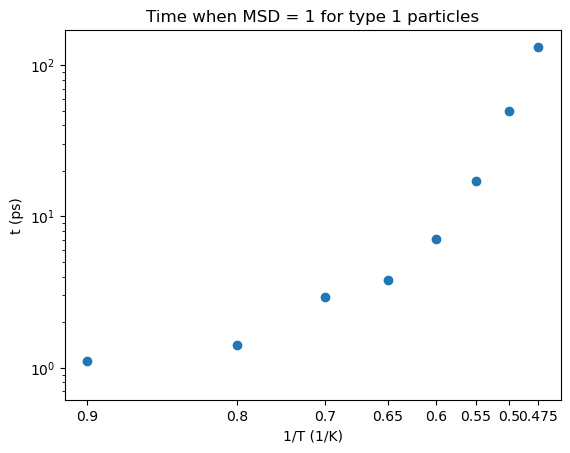

In [40]:
# find time where msd = 1 at each temperature
msd_1 = []
for i, msd_result in enumerate(msd_all):
    msd_1.append(msd_result.times[np.where(msd_result.results.timeseries < 1)[0][-1]])
plt.loglog(np.array(temp_list[1:]), msd_1[1:], 'o')
print(msd_1)
plt.xlabel('1/T (1/K)')
plt.ylabel('t (ps)')
plt.title('Time when MSD = 1 for type 1 particles')
plt.savefig('msd_1_type1.png', dpi=400)
    